# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [5]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att5'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

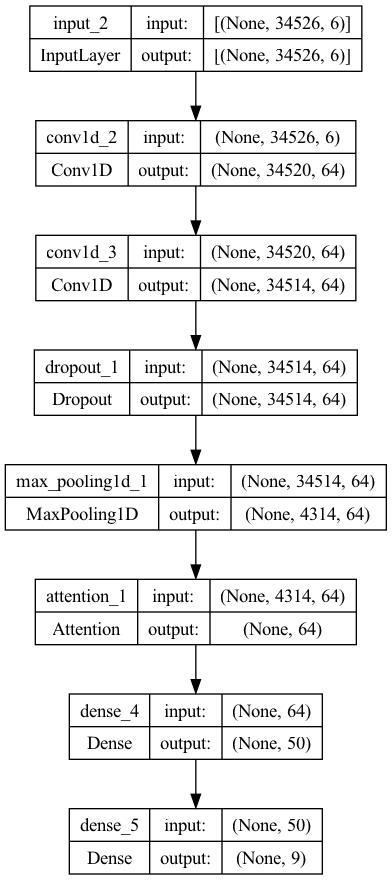

In [6]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 34526, 6)]        0         
                                                                 
 conv1d_2 (Conv1D)           (None, 34520, 64)         2688      
                                                                 
 conv1d_3 (Conv1D)           (None, 34514, 64)         28672     
                                                                 
 dropout_1 (Dropout)         (None, 34514, 64)         0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 4314, 64)          0         
 g1D)                                                            
                                                                 
 attention_1 (Attention)     (None, 64)                7920      
                                                             

In [8]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train,
                                 callback=[EarlyStopping(monitor='loss', patience=3)])

Epoch 1/100
311/311 [==============================] - 2769s 9s/step - loss: 2.6306 - ERM: 0.1060 - KDEL: 0.2786 - LMA: 0.0415 - MITO: 0.1191 - NES: 0.0769 - NIK: 0.0383 - NLS: -0.0659 - NUCP: 0.0734 - OMM: 0.0192 - val_loss: 2.1812 - val_ERM: 0.2353 - val_KDEL: 0.0893 - val_LMA: 0.1461 - val_MITO: 0.3209 - val_NES: 0.2363 - val_NIK: 0.1328 - val_NLS: 0.0303 - val_NUCP: 0.0702 - val_OMM: -0.0551
Epoch 2/100
311/311 [==============================] - 2875s 9s/step - loss: 2.3135 - ERM: 0.1601 - KDEL: 0.2723 - LMA: 0.0819 - MITO: 0.1280 - NES: -0.0035 - NIK: 0.0643 - NLS: -0.0447 - NUCP: 0.1268 - OMM: 0.0683 - val_loss: 2.1743 - val_ERM: 0.1199 - val_KDEL: 0.3032 - val_LMA: 0.4092 - val_MITO: 0.2500 - val_NES: -0.2682 - val_NIK: 0.0288 - val_NLS: 0.0865 - val_NUCP: -0.1012 - val_OMM: -0.1938
Epoch 3/100
311/311 [==============================] - 2795s 9s/step - loss: 2.1705 - ERM: 0.2450 - KDEL: 0.3157 - LMA: 0.1264 - MITO: 0.1852 - NES: 0.0370 - NIK: 0.1425 - NLS: 0.0492 - NUCP: 0.1813 

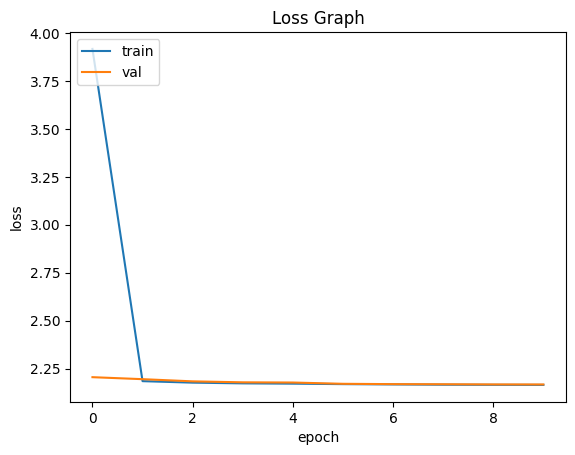

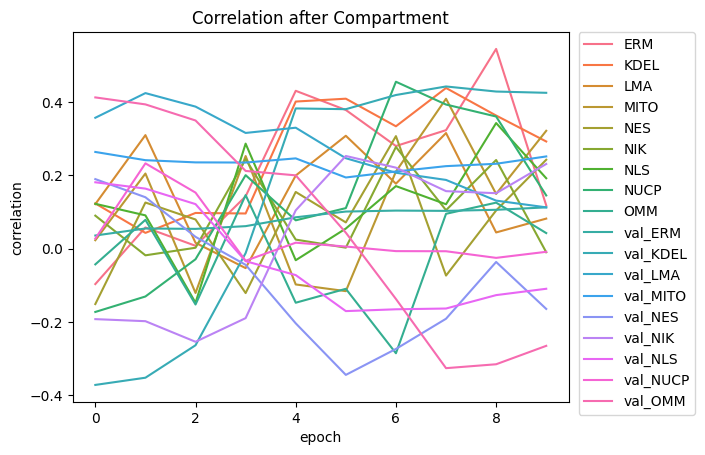

In [ ]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

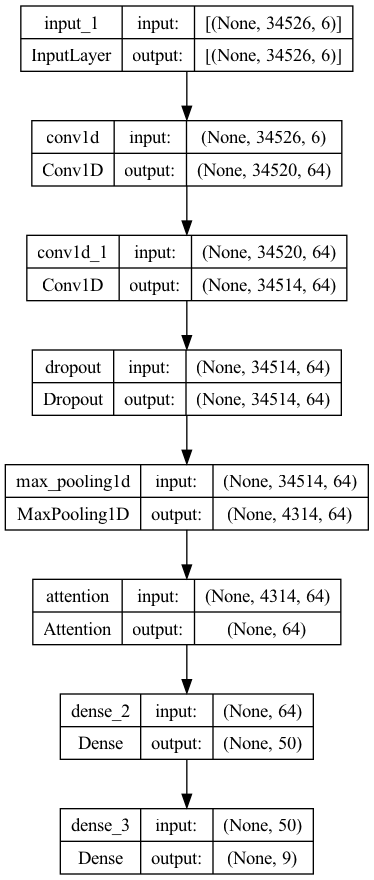

In [ ]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)